In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from sklearn.utils import shuffle
%matplotlib inline

In [3]:
def display_digit(digit):
    """ 
    graphically displays a 784x1 vector, representing a digit
    """
    image = digit
    plt.figure()
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    

# MNIST

In [4]:
mnist = fetch_mldata('MNIST original', data_home="/Users/sasankauppu/Desktop/Data Mining CS6220/")

mn_X_train = mnist.data[:60000]
mn_y_train = mnist.target[:60000]

mn_X_test = mnist.data[-10000:]
mn_y_test = mnist.target[-10000:]

mnist = None

In [46]:
logmodel = LogisticRegression(penalty='l2',verbose=1,solver = 'lbfgs',max_iter=100)
logmodel.fit(mn_X_train, mn_y_train)

print "Training accuracy: ",logmodel.score(mn_X_train,mn_y_train)
print "Testing accuracy: ",logmodel.score(mn_X_test,mn_y_test)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   38.6s finished


Training accuracy:  0.9258333333333333
Testing accuracy:  0.9174


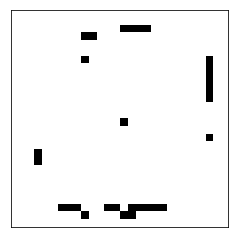

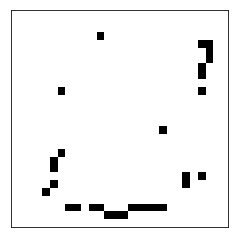

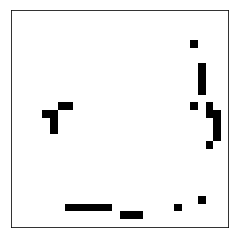

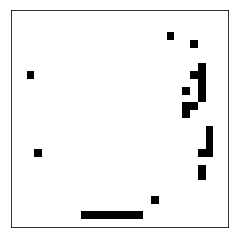

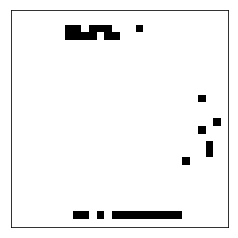

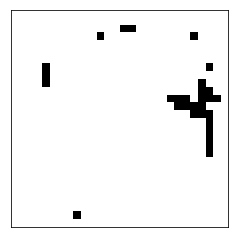

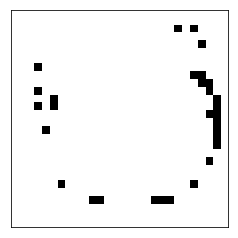

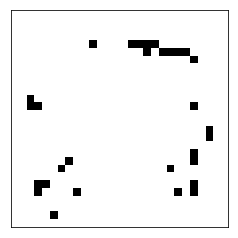

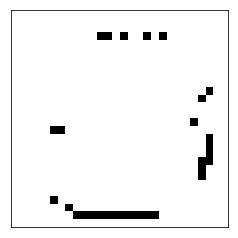

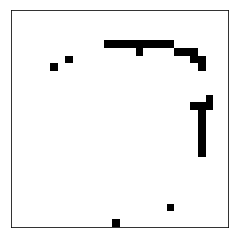

In [49]:
for ft in logmodel.coef_:
    p = [0 if i not in np.argsort(np.absolute(ft))[-30:] else 255 for i in range(len(ft))]
    display_digit(np.asarray(p))

In [38]:
dtmodel = DecisionTreeClassifier(max_depth=32,min_samples_split=20,min_samples_leaf=10)
dtmodel.fit(mn_X_train,mn_y_train)

print "Training accuracy: ",dtmodel.score(mn_X_train,mn_y_train)
print "Testing accuracy: ",dtmodel.score(mn_X_test,mn_y_test)

Training accuracy:  0.9223333333333333
Testing accuracy:  0.8777


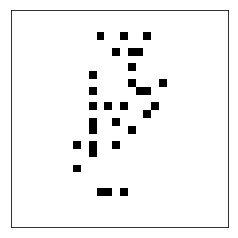

In [61]:
p = [0 if i not in np.argsort(np.absolute(dtmodel.feature_importances_))[-30:] else 255 for i in range(len(dtmodel.feature_importances_))]
display_digit(np.asarray(p))

In [62]:
mn_X_test=None
mn_X_train=None
mn_y_test=None
mn_y_train=None

# SPAMBASE

In [167]:
def load_spam_data():
    data = []

    f = open('/Users/sasankauppu/Desktop/Data Mining CS6220/DataMining/spambase/spambase.data')
    reader = csv.reader(f)
    
    for row in reader:
        data.append(row)
    f.close()
    
    X = np.array([x[:-1] for x in data]).astype(np.float)
    y = np.array([x[-1] for x in data]).astype(np.float)

    return X, y

spam_X,spam_y = load_spam_data()

In [169]:
idx = np.random.permutation(len(spam_X))
spam_X,spam_y = spam_X[idx], spam_y[idx]

split = int(len(spam_X)*0.75)


spam_X_train = spam_X[:split]
spam_y_train = spam_y[:split]
spam_X_test = spam_X[split:]
spam_y_test = spam_y[split:]


del(spam_X)
del(spam_y)

In [136]:
print spam_X_train.shape,spam_y_train.shape
print spam_X_test.shape

(3450, 57) (3450,)
(1151, 57)


In [137]:
logmodel = LogisticRegression(penalty='l2',verbose=1,solver = 'lbfgs',max_iter=100)
logmodel.fit(spam_X_train, spam_y_train)

print "Training accuracy: ",logmodel.score(spam_X_train,spam_y_train)
print "Testing accuracy: ",logmodel.score(spam_X_test,spam_y_test)

Training accuracy:  0.9220289855072463
Testing accuracy:  0.9313640312771503


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [161]:
np.argsort(np.absolute(logmodel.coef_))[-30:] 

array([[56, 55, 54,  0, 11, 35, 10, 18, 46, 12,  1, 13, 50,  2, 37,  9,
        49, 53, 31, 33, 14,  3, 42, 39, 17, 47, 27, 21, 20, 30,  8, 40,
        29, 48, 19, 38,  5, 34, 36, 28, 44, 43,  7, 32,  4, 52, 23, 16,
        51, 41, 22, 15, 25,  6, 45, 24, 26]])

In [138]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(spam_X_train,spam_y_train)

print "Training accuracy: ",dtmodel.score(spam_X_train,spam_y_train)
print "Testing accuracy: ",dtmodel.score(spam_X_test,spam_y_test)

Training accuracy:  0.9997101449275362
Testing accuracy:  0.9122502172024327


In [163]:
np.argsort(dtmodel.feature_importances_)[-30:]

array([19, 25, 10, 27,  7,  2,  9, 44,  5,  8, 23, 48, 16, 49, 17, 34, 11,
       45,  4, 26, 18, 20, 56, 55, 15, 54, 24, 51,  6, 52])

In [170]:
del(spam_X_test)
del(spam_X_train)
del(spam_y_test)
del(spam_y_train)

# 20NG

In [3]:
ng = fetch_20newsgroups(subset='all')

ng_X = ng.data
ng_y = ng.target

count_vect = CountVectorizer(stop_words="english",min_df=3,max_df=0.5)
ng_X = count_vect.fit_transform(ng_X)

tfidf_transformer = TfidfTransformer(use_idf=True)
ng_X = tfidf_transformer.fit_transform(ng_X)

ng_X = np.asarray(ng_X.todense())

/Users/sasankauppu/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [4]:
idx = np.random.permutation(len(ng_X))
ng_X,ng_y = ng_X[idx], ng_y[idx]

split = int(len(ng_X)*0.75)

ng_X_train = ng_X[:split]
ng_y_train = ng_y[:split]
ng_X_test = ng_X[split:]
ng_y_test = ng_y[split:]

del(ng)
del(ng_X)
del(ng_y)

In [6]:
logmodel = LogisticRegression(penalty='l2',verbose=1,solver = 'lbfgs',max_iter=100)
logmodel.fit(ng_X_train, ng_y_train)

print "Training accuracy: ",logmodel.score(ng_X_train,ng_y_train)
print "Testing accuracy: ",logmodel.score(ng_X_test,ng_y_test)

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.7min finished


Training accuracy:  0.9651195698316117
Testing accuracy:  0.8970713073005093


In [22]:
ng = fetch_20newsgroups(subset='all')
ng_labels = ng.target_names
del(ng)

In [24]:
text=""
ct=0

for ft in logmodel.coef_:
    print ng_labels[logmodel.classes_[ct]]
    text=""
    for i in np.argsort(np.absolute(ft))[-30:]:
        text+=count_vect.get_feature_names()[i]+" "
    print text
    print "---------------------------------------"
    ct+=1
    

alt.atheism
thoughts perry mantis umd gregg rice book benedikt morality moral wingate sgi atheist mangoe religion caltech kmr4 god livesey cobb jaeger rushdie osrhe islam okcforum mathew islamic atheism atheists keith 
---------------------------------------
comp.graphics
ftp algorithm surface program looking quicktime library files thanks viewer vga software hacker code points computer cview vesa format animation pov tiff siggraph 3do gif polygon images image 3d graphics 
---------------------------------------
comp.os.ms-windows.misc
deskjet utility fonts print sale bmp supporters using risc challenge printer ini nt win3 mouse program font manager drivers dos win ms os driver files ax cica microsoft file windows 
---------------------------------------
comp.sys.ibm.pc.hardware
disk settings ibm drives nanao cmos help modem monitors dos floppy port mac isa cpu irq vlb controller 486 thanks bus monitor scsi motherboard card ide pc gateway drive bios 
-----------------------------------

In [5]:
dtmodel = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1)
dtmodel.fit(ng_X_train, ng_y_train)

print "Training accuracy: ",dtmodel.score(ng_X_train,ng_y_train)
print "Testing accuracy: ",dtmodel.score(ng_X_test,ng_y_test)

Training accuracy:  0.999929248620348
Testing accuracy:  0.6676570458404074


In [28]:
text=""
for i in np.argsort(np.absolute(dtmodel.feature_importances_))[-30:]:
    text+=count_vect.get_feature_names()[i]+" "
print text

cramer circuit controller apple motif government doctor nhl encryption article team window atheists fbi turkish bike mac graphics god gun baseball israel rutgers car space hockey windows sale dod clipper 


In [6]:
dtmodel = DecisionTreeClassifier(max_depth=64,min_samples_split=20,min_samples_leaf=10)
dtmodel.fit(ng_X_train, ng_y_train)

print "Training accuracy: ",dtmodel.score(ng_X_train,ng_y_train)
print "Testing accuracy: ",dtmodel.score(ng_X_test,ng_y_test)

Training accuracy:  0.645464836564313
Testing accuracy:  0.5744906621392191


In [7]:
dtmodel = DecisionTreeClassifier(max_depth=64,min_samples_split=20,min_samples_leaf=5)
dtmodel.fit(ng_X_train, ng_y_train)

print "Training accuracy: ",dtmodel.score(ng_X_train,ng_y_train)
print "Testing accuracy: ",dtmodel.score(ng_X_test,ng_y_test)

Training accuracy:  0.682043299844347
Testing accuracy:  0.581918505942275
